<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/ML_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

**What is sales forecasting?**

A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts… etc.

#Import Important Libraries.

In [1]:
#Basic platform Libraries
import numpy as np
import pandas as pd
#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
#ML Algo Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#Data Import

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

**Importing Data set.**

In [4]:
#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2,index_col="Store")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Exploring Data sets.

**1** **Rossmann Data set**

In [5]:
#Rossmann Data frame
print("(Rows, Columns)=",df0.shape)
df0.sample(1116)

(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
796608,169,3,2013-07-17,9008,812,1,1,0,0
892723,394,1,2013-04-22,8931,652,1,1,0,0
231917,1113,1,2015-01-05,9633,877,1,1,0,1
81371,1092,3,2015-05-20,11766,1055,1,1,0,0
12443,179,1,2015-07-20,6640,877,1,0,0,1
...,...,...,...,...,...,...,...,...,...
873745,371,4,2013-05-09,0,0,0,0,a,0
332983,359,5,2014-09-19,6714,584,1,1,0,0
911020,851,6,2013-04-06,5411,499,1,0,0,0
18814,975,3,2015-07-15,8084,710,1,1,0,1


In [6]:
#Stores Data Frame
print("(Rows, Columns)=",df1.shape)
df1.sample()

(Rows, Columns)= (1115, 9)


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
318,d,c,32330.0,3.0,2014.0,0,NaN,NaN,NaN


#Merged DataSet

In [7]:
#Merge Both Data sets on store.
df= df0.merge(df1 , on='Store' , how='left')
print(df.shape)

(1017209, 18)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#**Feature Enigeering.**


 

#Feature Transformation

In [9]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.000000
DayOfWeek,int64,7,0,1017209,0.000000
Date,object,942,0,1017209,0.000000
Sales,int64,21734,0,1017209,0.000000
Customers,int64,4086,0,1017209,0.000000
Open,int64,2,0,1017209,0.000000
Promo,int64,2,0,1017209,0.000000
StateHoliday,object,5,0,1017209,0.000000
SchoolHoliday,int64,2,0,1017209,0.000000
StoreType,object,4,0,1017209,0.000000


Object Type Feature:-(Date,StateHoliday,StoreType,Assortment,PromoInterval)

In [10]:
#get the unique values for features in data set.
columns = list(df.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print(i)
    print(df[i].unique())

Store
[   1    2    3 ... 1113 1114 1115]
DayOfWeek
[5 4 3 2 1 7 6]
Sales
[ 5263  6064  8314 ...   660 17815 23303]
Customers
[ 555  625  821 ... 3900   36 4065]
Open
[1 0]
Promo
[1 0]
StateHoliday
['0' 'a' 'b' 'c' 0]
SchoolHoliday
[1 0]
StoreType
['c' 'a' 'd' 'b']
Assortment
['a' 'c' 'b']
CompetitionOpenSinceMonth
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2
[0 1]
Promo2SinceWeek
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


**Date**
* Date itself  is not very useful to us we need months Days and Years to track our sales and customers mood.  
* Extract Day, year , months from Date and drop the Date feature itself.

In [11]:
df.Date[1]

'2015-07-31'

In [12]:
#Create new features Year and month out of Date.
df['year'] = df['Date'].apply(lambda x : int(str(x)[0:4]))
df['month'] = df['Date'].apply(lambda x : int(str(x)[5:7]))
df["Day"]=df["Date"].apply(lambda x: int(str(x)[8:10]))

In [13]:
#Drop the Date feature
df.drop(["Date"], axis='columns', inplace=True)

**StateHoliday**
*  In the stateHoliday a = public holiday, b = Easter holiday, c = Christmas holiday, 0 = No State Holidays. 
* Hence we can consider a,b,c as holiday and imput them with 1.
* then convert column into numeric type

In [14]:
print(df["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


In [15]:
#Convert the a,b,c into 1 as they represent Holiday
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df["StateHoliday"] = df["StateHoliday"].astype(int)

In [16]:

df["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

#Handling Missing Values.


In [17]:
df.shape

(1017209, 20)

In [18]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
Day                               0
dtype: int64

**Handling the Missing Value**
* Fill CompetitionDistance with max value.

* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Drope Promo2SinceWeek ,Promo2SinceYear , PromoInterval as  they have huge nulls in them and handling them may disturb the weightage of really good features.



In [19]:
#Handle missing values 
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df1['CompetitionDistance'].max())
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df1['CompetitionOpenSinceMonth'].mode().iloc[0])
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df1['CompetitionOpenSinceYear'].mode().iloc[0])
df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis='columns', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [21]:
print(df.StoreType.unique())
df.Assortment.unique()

['c' 'a' 'd' 'b']


array(['a', 'c', 'b'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [23]:
columns = list(df.columns)

columns.remove('CompetitionDistance')
for i in columns:
    print(i)
    print(df[i].unique())

Store
[   1    2    3 ... 1113 1114 1115]
DayOfWeek
[5 4 3 2 1 7 6]
Sales
[ 5263  6064  8314 ...   660 17815 23303]
Customers
[ 555  625  821 ... 3900   36 4065]
Open
[1 0]
Promo
[1 0]
StateHoliday
[0 1]
SchoolHoliday
[1 0]
StoreType
['c' 'a' 'd' 'b']
Assortment
['a' 'c' 'b']
CompetitionOpenSinceMonth
[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2
[0 1]
year
[2015 2014 2013]
month
[ 7  6  5  4  3  2  1 12 11 10  9  8]
Day
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]


#Outliers


**Handling outliers**
* Start with our target variable as it is the most important variable.
* Then we will explore other Numerical based variables like Customers, competition distance and all.
* This Data set have some geniune values which seems as outliers. so we will be working on only those values which is very impotant  to remove and removal of those will does not affect or data set.

**1** **Sales**

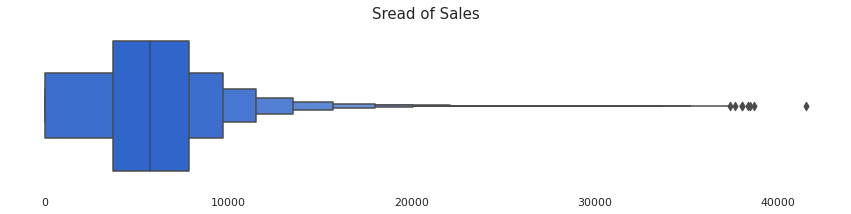

In [24]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['Sales'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Sread of Sales',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

**Observation:-**We can clearly visualize that Sales above 25000 is very less in percentage. lets explore more to validate our assumption.

* **Customers is the only feature which has linear relation with Sales.Hence it is the most impoetant for our linear regression.
* Hence regulate the feature in such a way that it would provide accurate result.

In [25]:
# sns.set(style='whitegrid')

 
# sns.scatterplot(x="Sales",y="Customers",style="DayOfWeek" ,data=df)

In [26]:
#Rows with Sales above 25k
df_mask=df.loc[(df['Sales']>=20000) & (df["Customers"]<1500)]
df_mask


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,Day
841,842,5,23996,1362,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2015,7,31
1956,842,4,20363,1190,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2015,7,30
3071,842,3,22190,1254,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2015,7,29
4186,842,2,21351,1183,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2015,7,28
5301,842,1,27881,1493,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948076,1112,1,20541,1422,1,1,0,0,c,c,1880.0,4.0,2006.0,0,2013,3,4
962835,261,1,23156,1425,1,1,0,1,d,c,15340.0,4.0,2015.0,1,2013,2,18
963416,842,1,20734,1328,1,1,0,0,d,c,1200.0,11.0,2007.0,0,2013,2,18
978445,261,1,20332,1413,1,1,0,0,d,c,15340.0,4.0,2015.0,1,2013,2,4


**Obervation:-**
We can drop the sales datapoints which are greater than 35k as they are very less percentage of the dataset and are probably outliers for our Algo.


**Drop Outliers**


In [27]:
#Drop sales value above 25000
df.drop(df_mask.index,inplace=True)




**2** **Customers**

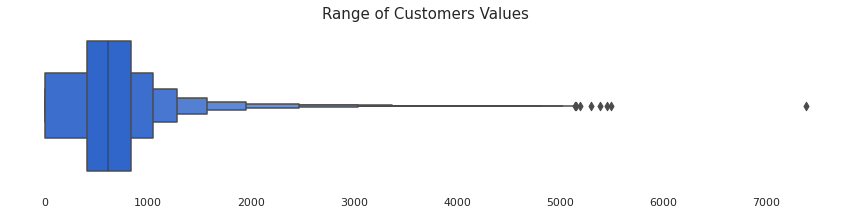

In [28]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['Customers'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

In [29]:
#Customers above 5000
df_mask2=df.loc[(df['Customers']>=5000) & (df["Sales"]<30000)]
# filtered_df = df[df_mask]
# filtered_df
df_mask2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,Day
993496,817,2,27190,7388,1,1,0,0,a,a,140.0,3.0,2006.0,0,2013,1,22


**Obervation:-**We can drop the Customers datapoints which are greater than 2500 as they are very less percentage of the dataset and are probably outliers.

**Drop Outliers**

In [30]:
#Drop Cutomers value above 2500
df.drop(df_mask2.index,inplace=True)

**CompetitionOpenSinceYear**
* In real world scenario it is possible to have these values as exceptionals.But for the ML algos and they may create problem.
* This feature seems to have an outlier for the model. 
* Hence we remove only those values Removal of which does not affect the original data. And also which are at extreme point.

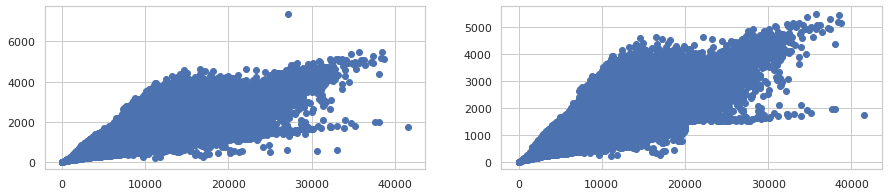

In [31]:
# Scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df0['Sales'], df0['Customers'])
ax2.scatter(df['Sales'], df['Customers'])
# fig, ax = plt.subplots(figsize = (18,4))
# ax[0].scatter(df0['Sales'], df0['Customers'])
# ax.scatter(df['Sales'], df['Customers'])
# x-axis label
ax.set_xlabel('Sales')
 
# y-axis label
ax.set_ylabel('Customers')
plt.show()

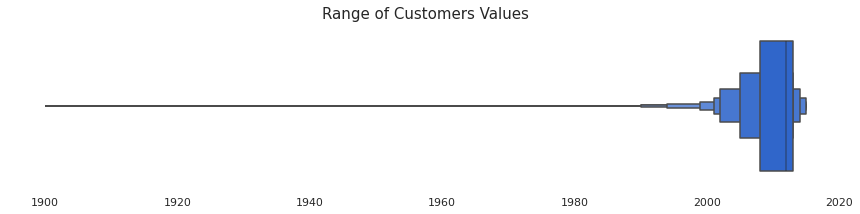

In [32]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['CompetitionOpenSinceYear'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [33]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionOpenSinceYear'] < 1980].index,inplace=True)

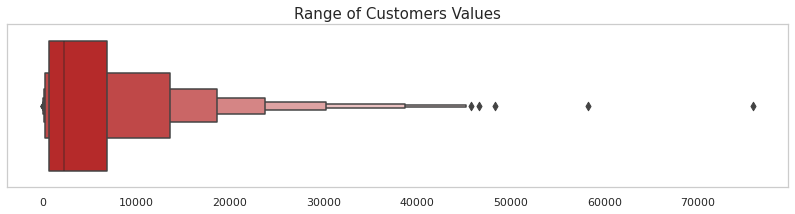

In [34]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionDistance'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

In [35]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionDistance'] > 55000].index,inplace=True)

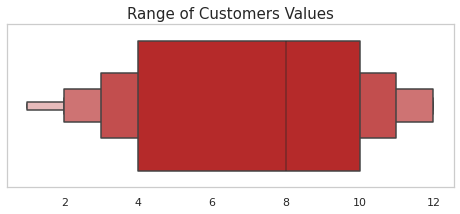

In [36]:
sns.set_theme(rc={'figure.figsize': (8,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionOpenSinceMonth'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

**Conclusion:-**
* We have converted the data type in usable formate.
* hadled the missing values.
* Deal with categorical values.
* Handled outliers 

**GREAT ! we can move head towards understanding our Data set for further exploration using visualization** 

In [37]:
df.shape

(1010673, 17)

#**EDA With Data Visualization**

#Improving Target Variable (Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


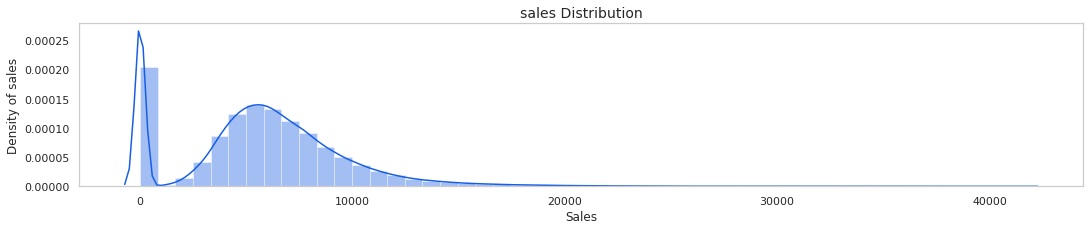

In [38]:
#Distribution of Sales
sns.set_theme(palette='autumn',rc={'figure.figsize': (18,3)},style='whitegrid')
sns.distplot(x=df0['Sales'],color='#175ee3')
plt.title('sales Distribution',size=14)
plt.ylabel('Density of sales',size=12)
plt.xlabel('Sales',size=12)
plt.grid(False)

plt.show()  

**Observation:-**Lots of zero sales is disturbing our Target Variable.
When stores are closed the sales value is zero hence we have deal with the zero sales.

**Some exceptional cases**
* Looking for a scenerio where the Stores are open and yet there is no sales on that .
* Looking for a scenerio where the Stores are close and yet there sales on that day

In [39]:
df.shape

(1010673, 17)

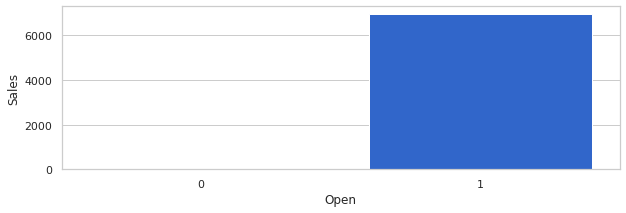

In [40]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,3)},style='whitegrid')
sns.barplot(x = 'Open',y = 'Sales',data = df0,color='#175ee3')
 
# Show the plot
plt.show()

**conclusion:-**
* When stores are closed there is no relation hence remove rows when stores are closed.
*  where there is no record of sales even without any holidays. We can remove these data points too as they are an exceptional case
* Further we can also remove the open column from or Data set.

In [41]:
#Drop Open column.
df.drop("Open",axis="columns",inplace=True)

In [42]:
#Drop when Sales = 0
df.drop(df.loc[(df['Sales']==0)].index,inplace=True)
print(df.shape)

(838669, 16)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


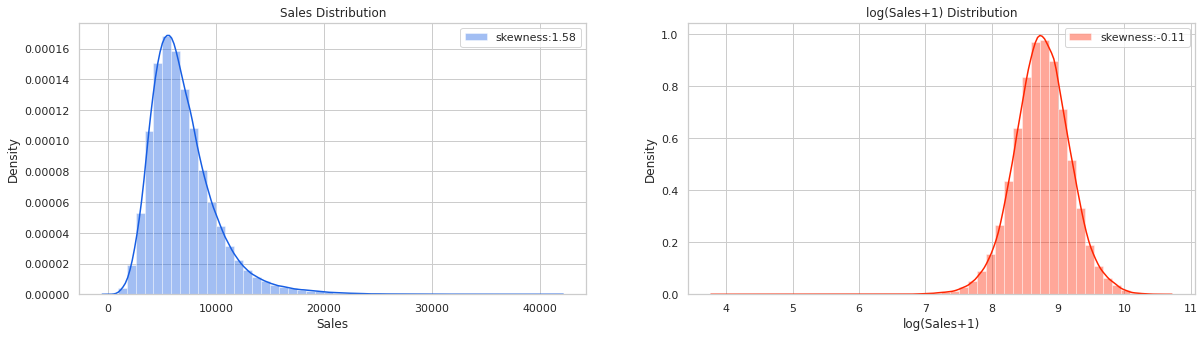

In [43]:
#Compare Distribution of Sales withot and with log tranformation after cleaning it.
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Sales'],hist = True,label='skewness:{:.2f}'.format(df['Sales'].skew()),ax = ax1,color='#175ee3')
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

**Conclusion:-**
* Great! Oue Target variable is ready to train and test.

#Understanding other Feature.

**Days of Week**

In [44]:
df.DayOfWeek.value_counts()

6    143128
2    143032
3    141022
5    137746
1    136556
4    133774
7      3411
Name: DayOfWeek, dtype: int64

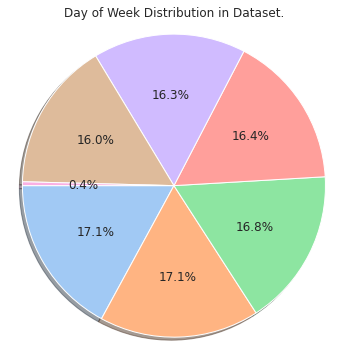

In [45]:
#Affect on Sales during different Day of week

sizes = df.DayOfWeek.value_counts()
colors = sns.color_palette('pastel')
explode = (0.1, 0.0)
plt.pie(sizes,colors=colors,
        autopct='%1.1f%%',shadow=True, startangle=180)
plt.axis('equal')
plt.title("Day of Week Distribution in Dataset.")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Observation:-** 
* Sundays percentage is reduced highly due to removal of slaes == zero. 
* This could creat an unbalance in our feature DayOfWeek.

**Affect of Days Of Week over Sales** 

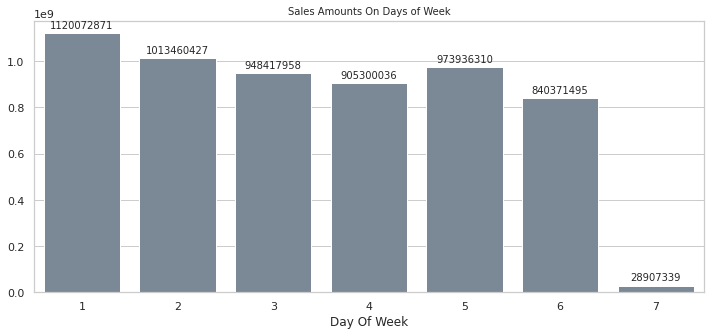

In [46]:
#Groupby Content Rating count the apps sort in decending order.
Sales_df = df.groupby('DayOfWeek').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Sales_df['DayOfWeek'],y=Sales_df.Sales,color='lightslategrey')

#Title
plt.title('Sales Amounts On Days of Week',size=10)

#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')

# Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Obsevation:-**
* Monday(1) and Friday(5) have highest sales.
* Sundays have minimum Sales compared to all the other days.

**3** **Customers**

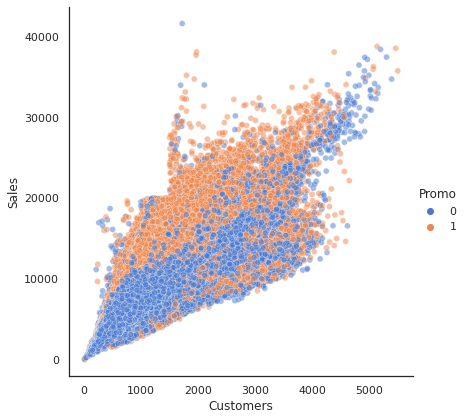

In [47]:
sns.set_theme(style="white")

# # Load the example mpg dataset
# mpg = sns.load_dataset("")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Customers", y="Sales", hue="Promo",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

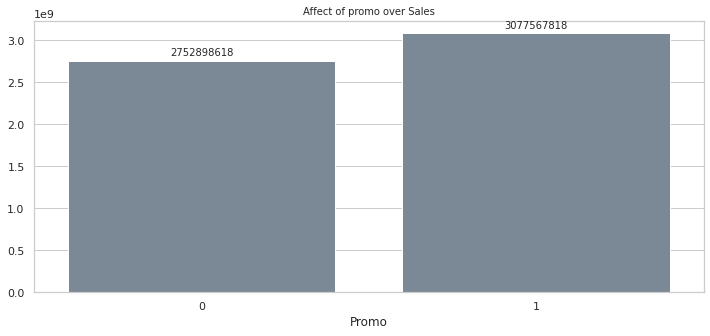

In [48]:
Sales_df = df.groupby('Promo').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Sales_df['Promo'],y=Sales_df.Sales,color='lightslategrey')

#Title
plt.title('Affect of promo over Sales',size=10)

#X labels
plt.xlabel('Promo')
plt.ylabel('')

#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Observation:-** 
* Promos atrract customers more.
* sales have impact due to customers.

**4** **State Holiday**

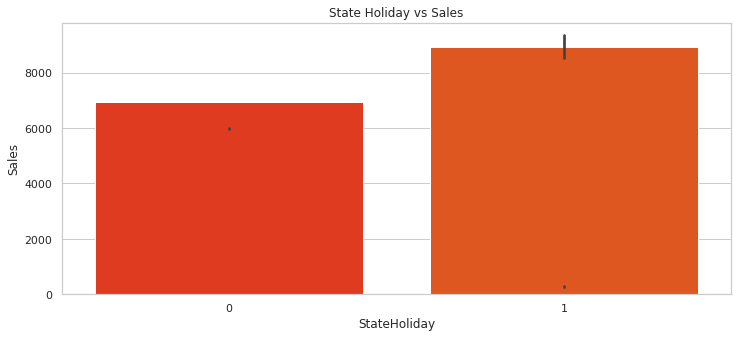

In [49]:
sns.barplot(x='StateHoliday', y='Sales', data=df0).set(title='State Holiday vs Sales')
sns.barplot(x='StateHoliday', y='Sales', data=df).set(title='State Holiday vs Sales')
plt.show()

**5** **School Holiday**

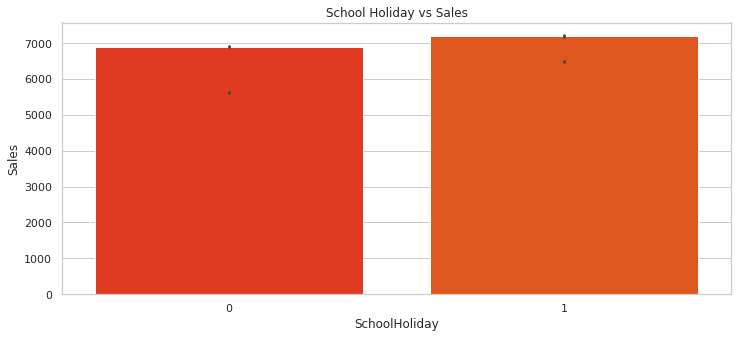

In [50]:
sns.barplot(x='SchoolHoliday', y='Sales', data=df0).set(title='School Holiday vs Sales')
sns.barplot(x='SchoolHoliday', y='Sales', data=df).set(title= 'School Holiday vs Sales')
plt.show()

In [51]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'year', 'month', 'Day'],
      dtype='object')

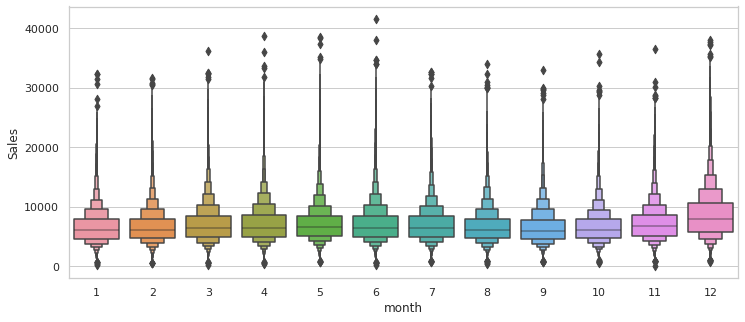

In [52]:
# boxplot = sns.boxplot(x="month", y="Sales", data=df )
# boxplot = sns.stripplot(x="month", y="Sales", data=df, marker="o", alpha=0.3, color="black")
# boxplot.axes.set_title("Distribution of Forest Fire Conditions", fontsize=16)
# boxplot.set_xlabel("Conditions", fontsize=14)
# boxplot.set_ylabel("Values", fontsize=14)
# plt.show()
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.boxenplot(x ="month",
             y ="Sales",
             data = df)
plt.show()

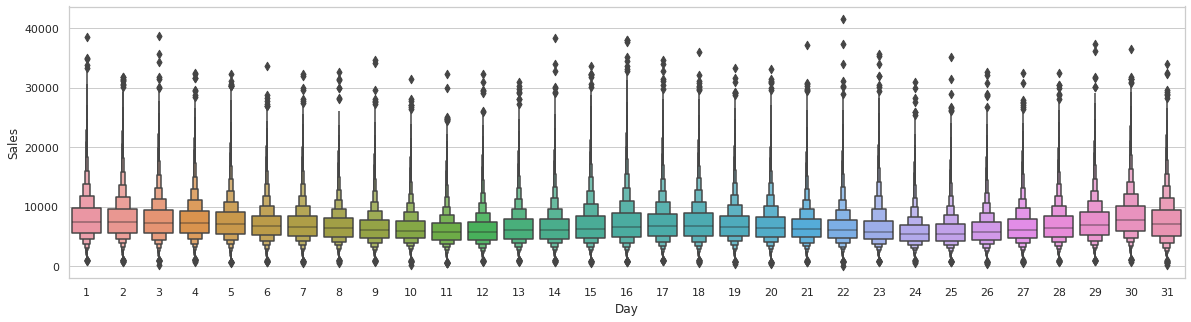

In [53]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,5)},palette='autumn')
sns.boxenplot(x ="Day",
             y ="Sales",
             data = df)
plt.show()

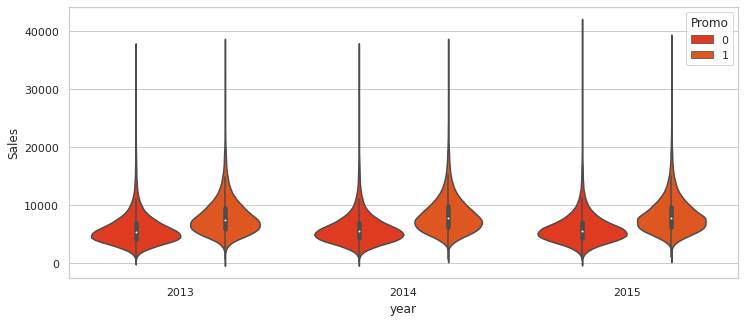

In [54]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.violinplot(x="year", y="Sales", hue="Promo", data=df)
plt.show()

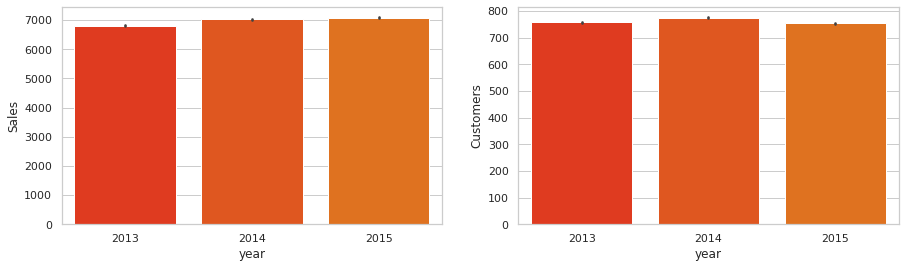

In [55]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.barplot(x='year', y='Sales', data=df, ax=axis1)
sns.barplot(x='year', y='Customers', data=df, ax=axis2)
plt.show()

In [57]:
df.Assortment

0          a
1          a
2          a
3          c
4          a
          ..
1016776    a
1016827    b
1016863    b
1017042    b
1017190    b
Name: Assortment, Length: 838669, dtype: object

In [58]:
Sales_df = df.groupby(["Promo","Assortment"]).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
Sales_df

,Promo,Assortment,Sales
4,1,b,28300253
1,0,b,42646059
2,0,c,1349309419
0,0,a,1360943140
5,1,c,1479269443
3,1,a,1569998122


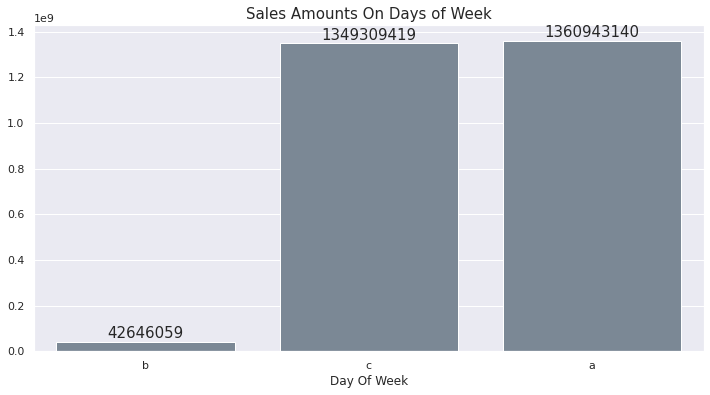

In [59]:
assortment_df = df.groupby('Assortment').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(rc={'figure.figsize':(12,6)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=assortment_df['Assortment'],y=Sales_df.Sales,color='lightslategrey')

#Title
plt.title('Sales Amounts On Days of Week',size=15)

#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')

#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


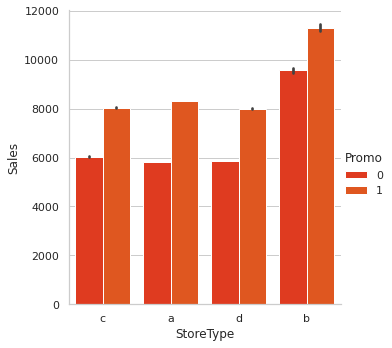

In [61]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.factorplot("StoreType", "Sales", hue="Promo", data=df, kind="bar")
plt.show()

**Assortment**

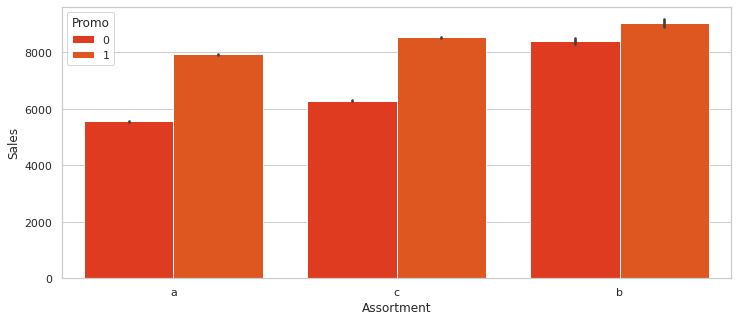

In [62]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.barplot(x = 'Assortment',y = 'Sales',hue="Promo", data = df)
 
# Show the plot
plt.show()

Assortment has a higher edge over promo.

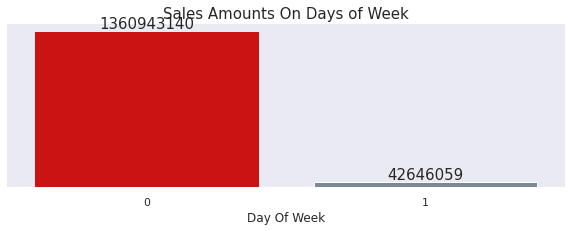

In [63]:
Promo_df = df.groupby(['Promo']).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(rc={'figure.figsize':(10,3)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Promo_df['Promo'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

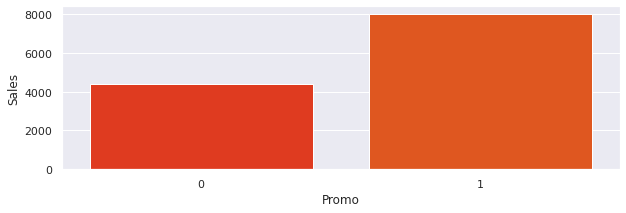

In [64]:
sns.set_theme(rc={'figure.figsize':(10,3)},palette='autumn')
sns.barplot(x = 'Promo',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [65]:
df.shape

(838669, 16)

**One Hot Encoding for the StoreType and Assortment**
* StoreType - 4 different store models: a, b, c, d. 

* Assortment - assortment level: a = basic, b = extra, c = extended

In [66]:
#We can use Dummies we have less categories to encode.
df=pd.get_dummies(df, columns = ['StoreType',	'Assortment'])

#Buliding a Regression Model

In [70]:
#Corr map
correlation = df.corr()
correlation

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,Day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Store,1.000000,0.000568,0.008506,0.035064,-0.000138,0.003343,0.000530,-0.014361,-0.037906,0.001887,0.005552,0.000320,0.001887,-0.000056,0.005357,-0.001359,0.060162,-0.049980,-0.011184,0.021226,0.007007
DayOfWeek,0.000568,1.000000,-0.178057,-0.096564,-0.288883,-0.001519,-0.139127,0.002688,0.000788,0.001508,-0.002755,0.002068,-0.019706,0.008501,-0.004866,0.038185,-0.003076,-0.003643,-0.003657,0.027631,-0.001794
Sales,0.008506,-0.178057,1.000000,0.824820,0.368553,0.020680,0.037916,-0.040791,-0.036457,0.026994,-0.128656,0.036255,0.073109,-0.052138,-0.009096,0.145867,-0.002643,-0.030929,-0.113890,0.054340,0.103307
Customers,0.035064,-0.096564,0.824820,1.000000,0.182412,0.050567,0.024253,-0.164267,-0.034312,0.010610,-0.202484,-0.000689,0.053354,-0.035448,0.088649,0.431047,0.051597,-0.260387,-0.038686,0.322921,-0.025029
Promo,-0.000138,-0.288883,0.368553,0.182412,1.000000,0.002659,0.028901,-0.000980,-0.000520,-0.000707,-0.000484,0.024004,-0.006444,-0.126545,0.002812,-0.017898,0.002182,0.000584,0.001622,-0.012960,0.000935
StateHoliday,0.003343,-0.001519,0.020680,0.050567,0.002659,1.000000,0.012698,0.004845,0.003631,0.001348,-0.009625,0.002304,0.001296,-0.007957,-0.016575,0.118274,-0.005830,-0.012396,-0.008186,0.093757,-0.010317
SchoolHoliday,0.000530,-0.139127,0.037916,0.024253,0.028901,0.012698,1.000000,-0.003429,-0.000554,-0.000135,-0.008409,-0.038662,0.118612,0.038031,0.002172,-0.003021,0.002713,-0.003475,0.002871,-0.002808,-0.002320
CompetitionDistance,-0.014361,0.002688,-0.040791,-0.164267,-0.000980,0.004845,-0.003429,1.000000,-0.046006,0.009919,-0.135107,0.000587,0.002982,-0.000459,-0.050200,-0.080389,-0.098389,0.150759,-0.135349,-0.056535,0.146687
CompetitionOpenSinceMonth,-0.037906,0.000788,-0.036457,-0.034312,-0.000520,0.003631,-0.000554,-0.046006,1.000000,0.036008,0.021946,-0.000771,-0.001166,0.000234,-0.026622,0.000412,-0.029039,0.050195,-0.038126,0.022736,0.033686
CompetitionOpenSinceYear,0.001887,0.001508,0.026994,0.010610,-0.000707,0.001348,-0.000135,0.009919,0.036008,1.000000,0.004310,0.000322,0.000515,-0.000042,-0.039568,0.002165,-0.040195,0.071952,-0.110114,-0.014536,0.113127


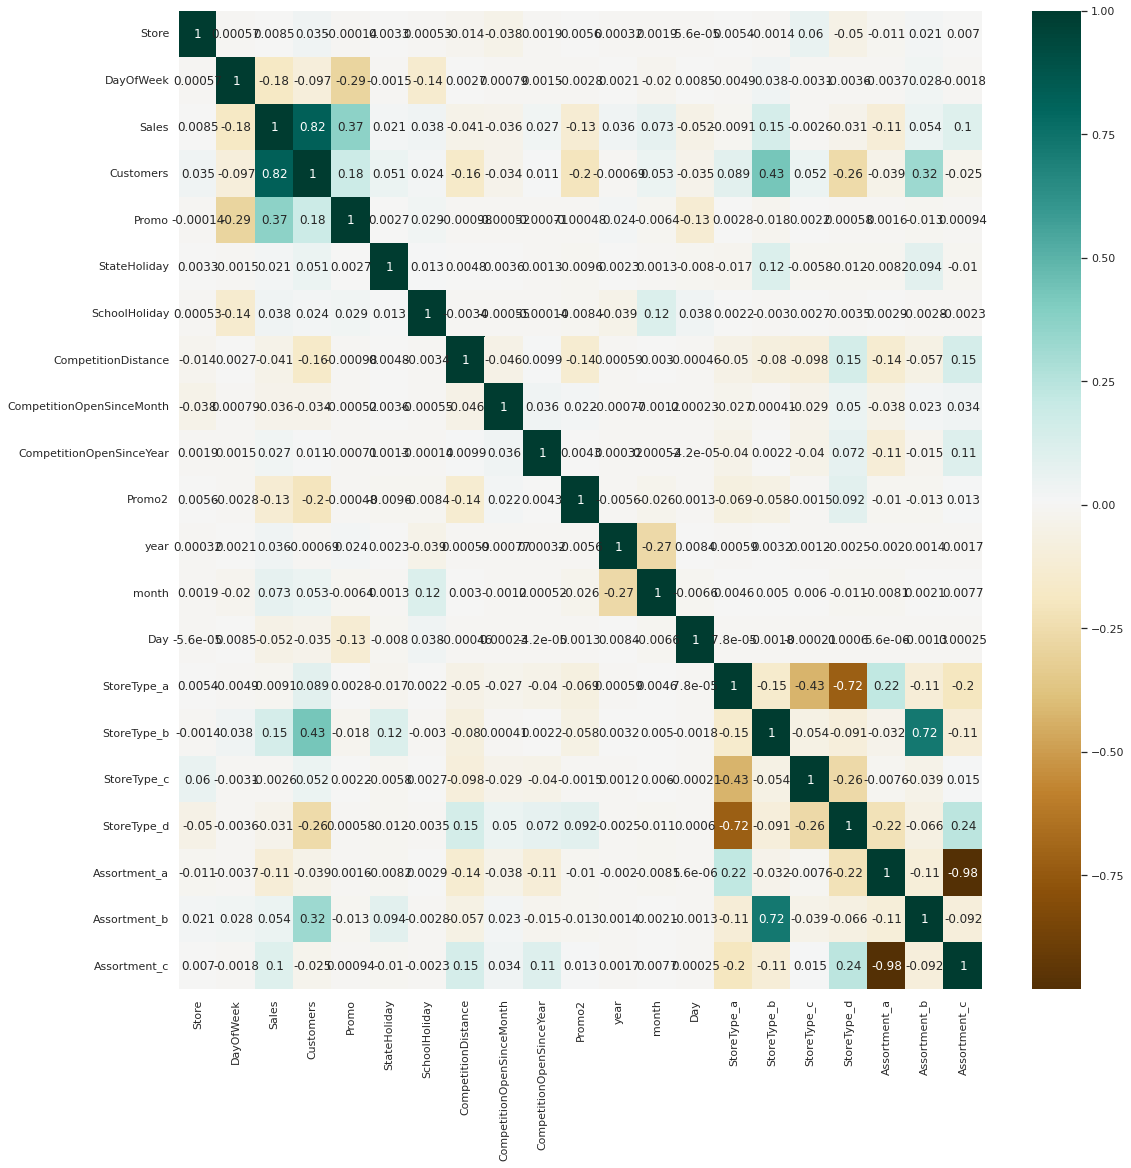

In [71]:
# Heat Map
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, linewidths=0.0, cmap='BrBG')

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Sales'],axis=1),df['Sales'], test_size=0.2, random_state=0)

In [74]:
X_train.shape, y_train.shape

((670935, 20), (670935,))

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.827958735707363

In [77]:
x_train_pred = model.predict(X_train)
r2_score(y_train, x_train_pred)

0.8286131567102344

In [78]:
pred_df=pd.DataFrame([y_predict,y_test])
pred_df=pred_df.rename(index={0:"Real",1:"predicted"})
#Transpose the dataset
pred_df.T

,Real,predicted
0,10740.865114,15844.0
1,10733.550270,12603.0
2,6568.489131,7284.0
3,4966.945308,4818.0
4,5332.291538,5087.0
...,...,...
167729,6307.684420,7051.0
167730,10089.156685,11016.0
167731,7650.379072,6445.0
167732,7071.883635,7215.0


In [79]:
R2_2=r2_score(y_test,y_predict)
MAE2=mean_absolute_error(y_test,y_predict)
MSE2=mean_squared_error(y_test,y_predict)

print("R2_score of processed Feature",R2_2)
print("Mean absolute error of precessed Feature",MAE2)
print("Mean squared error of processed Feature",MSE2)

R2_score of processed Feature 0.827958735707363
Mean absolute error of precessed Feature 940.4566174011777
Mean squared error of processed Feature 1650539.4594148395


Text(0, 0.5, 'Predicted values')

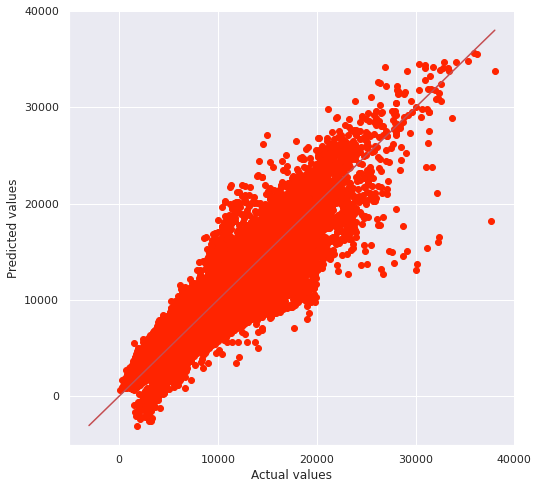

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#Lasso Reg

**Models**
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [81]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score



In [82]:
las = LassoCV()
las.fit(X_train,y_train)

LassoCV()

In [83]:
x_test_pred_ls = las.predict(X_test)
r2_score(y_test, x_test_pred_ls)

0.6877307515991218

In [84]:
x_train_pred = las.predict(X_train)
r2_score(y_train, x_train_pred)

0.690479330781448

#Ridge Reg

In [85]:
rid = RidgeCV()
rid.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [86]:
x_test_pred_rd = rid.predict(X_test)
r2_score(y_test, x_test_pred_rd)

0.827956327183139

In [87]:
x_train_pred = rid.predict(X_train)
r2_score(y_train, x_train_pred)

0.8286130211160245

#Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

# prediction_open = model.predict(X_test)
# prediction_closed = np.zeros(combined_data_closed.shape[0])

# y_predict = np.append(prediction_open,prediction_closed)

0.9521987618296412

r2_score: 0.9521987618296412
Mean absolute error: 452.81
Root mean squared error:  677.1988564178033


Text(0, 0.5, 'Predicted values')

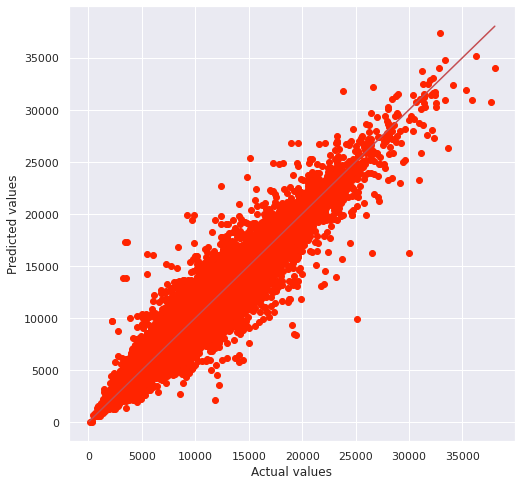

In [89]:
# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:-**
The decision tree regressor performing well compared to Linear

#Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

y_predict = random_forest_model.predict(X_test)
r2_score(y_test, y_predict)

0.976713362423493

r2_score: 0.976713362423493
Mean absolute error: 318.82
Root mean squared error:  472.6612890423827


Text(0, 0.5, 'Predicted values')

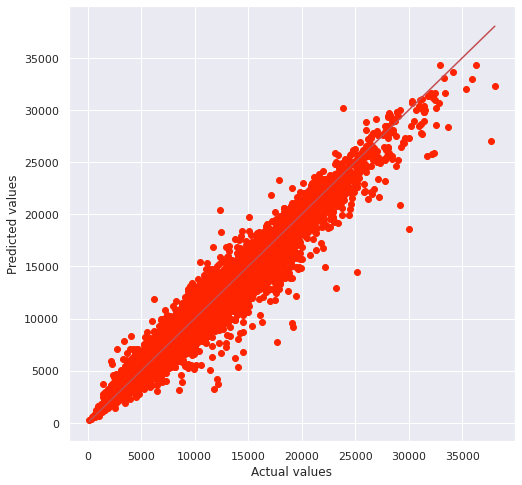

In [91]:
# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**
Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

#Understanding the important features

In [92]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'Day',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [93]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.745901
6,CompetitionDistance,0.051795
16,StoreType_d,0.041978
3,Promo,0.033612
0,Store,0.031907
18,Assortment_b,0.018923
8,CompetitionOpenSinceYear,0.013223
7,CompetitionOpenSinceMonth,0.011861
1,DayOfWeek,0.010497
14,StoreType_b,0.008579


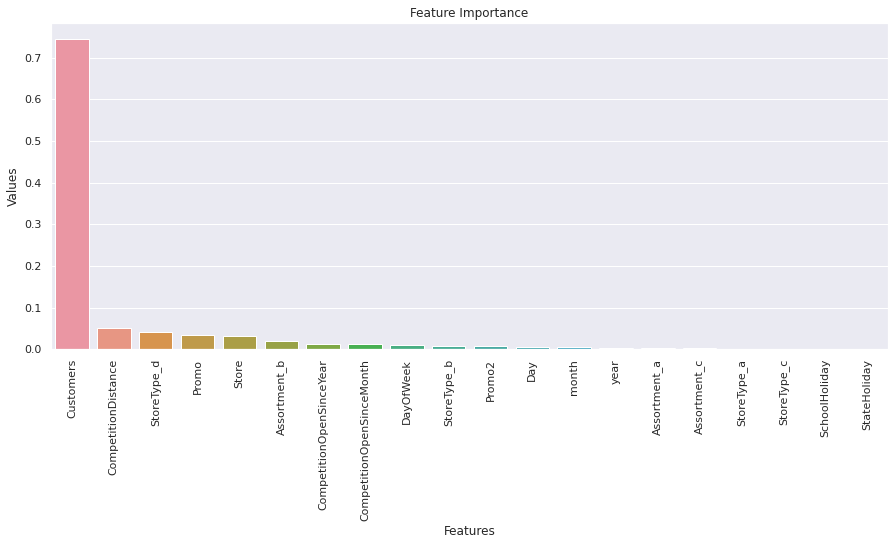

In [94]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

**Gradient Boosting**
We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

* The average value of the target column and uses as an initial prediction every input.
* The residuals (difference) of the predictions with the targets are computed.
* A decision tree of limited depth is trained to predict just the residuals for each input.
* Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
* Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
* Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.
* The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). 
* The term "boosting" refers the general technique of training new models to improve the results of an existing model.

* To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [95]:
from xgboost import XGBRegressor
XGBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=4)

# %%time
XGBmodel.fit(X_train, y_train)


y_predict = XGBmodel.predict(X_test)
r2_score(y_test, y_predict)

[18:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9061781592166223

**Feature importance**
* Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [96]:
importance_df = pd.DataFrame({
    'feature': columns,
    'importance': XGBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [97]:
importance_df

,feature,importance
2,Customers,0.395057
16,StoreType_d,0.125960
18,Assortment_b,0.099185
3,Promo,0.098648
14,StoreType_b,0.072344
6,CompetitionDistance,0.030385
19,Assortment_c,0.029107
1,DayOfWeek,0.023029
11,month,0.018529
9,Promo2,0.018118
